In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = load_breast_cancer()
x = df.data
y = df.target
print(df.feature_names)
print(x.shape[1])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [3]:
s = StandardScaler()
x_s = s.fit_transform(x)


In [4]:
pca = PCA()
x_p = pca.fit_transform(x_s)
x_p

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
         3.39144536e-02, -4.56477199e-02,  4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
        -3.26241827e-02,  5.68742432e-03,  1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
        -4.70258247e-02, -3.14589659e-03, -7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
         2.57775589e-03, -6.70621179e-03, -3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
         6.80863833e-02,  8.41632764e-02,  2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
         9.51587894e-03,  6.09131090e-02,  1.94755854e-02]],
      shape=(569, 30))

In [5]:
c = []
for i in range (1, 31):
  pca_1 = PCA(n_components= i)
  x_p1 = pca_1.fit_transform(x_s)
  v = np.sum(pca_1.explained_variance_ratio_)
  c.append(v)
c

[np.float64(0.4427202560752637),
 np.float64(0.6324320765155946),
 np.float64(0.7263637090899084),
 np.float64(0.7923850582446098),
 np.float64(0.8473427431680725),
 np.float64(0.887587963566906),
 np.float64(0.9100953006967311),
 np.float64(0.9259825386969444),
 np.float64(0.9398790324425355),
 np.float64(0.951568814336667),
 np.float64(0.9613660042126472),
 np.float64(0.970071383220026),
 np.float64(0.9781166330919933),
 np.float64(0.9833502905469196),
 np.float64(0.986488122714547),
 np.float64(0.9891502160796992),
 np.float64(0.9911301840050235),
 np.float64(0.9928841434552499),
 np.float64(0.994533396514475),
 np.float64(0.9955720432628137),
 np.float64(0.9965711397265139),
 np.float64(0.9974857864775682),
 np.float64(0.9982971477364674),
 np.float64(0.9988989813031391),
 np.float64(0.9994150236823043),
 np.float64(0.9996876116777818),
 np.float64(0.9999176271402878),
 np.float64(0.9999706050693259),
 np.float64(0.9999955651725727),
 np.float64(1.0)]

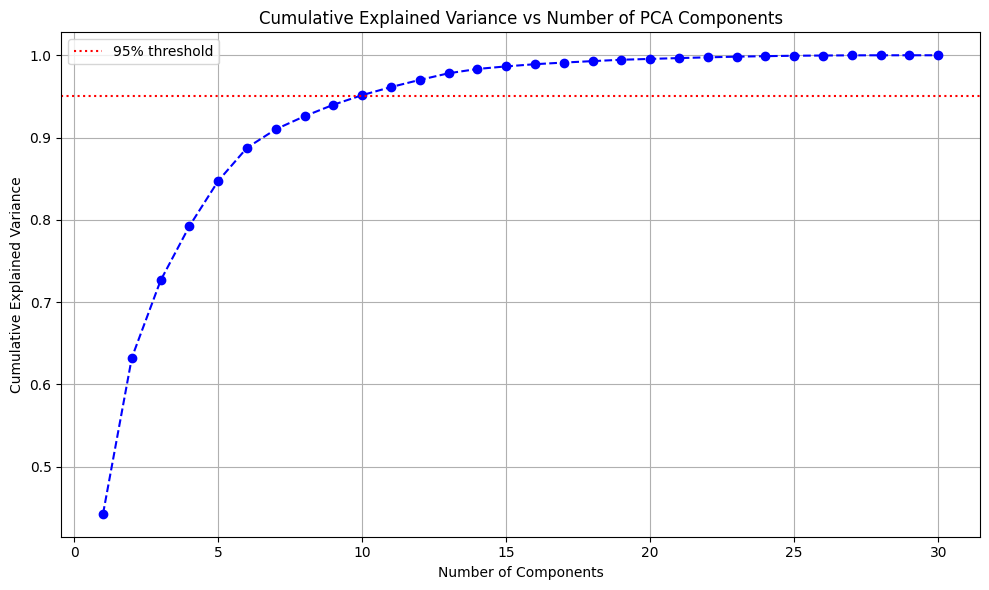

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), c, marker='o', color='blue', linestyle='--')
plt.title('Cumulative Explained Variance vs Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='red', linestyle=':', label='95% threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
b = []
for i in range (1, 31):
  pca_2 = PCA(n_components= i)
  x_p2 = pca_2.fit_transform(x_s)
  X_train, X_test, y_train, y_test = train_test_split(x_p2, y, test_size=0.2, random_state=42)
  model = LogisticRegression(max_iter=10000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  b.append(accuracy)
print(b)

[0.9473684210526315, 0.9912280701754386, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9912280701754386, 0.9824561403508771, 0.9824561403508771, 0.9912280701754386, 0.9824561403508771, 0.9824561403508771, 0.9912280701754386, 0.9912280701754386, 0.9912280701754386, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


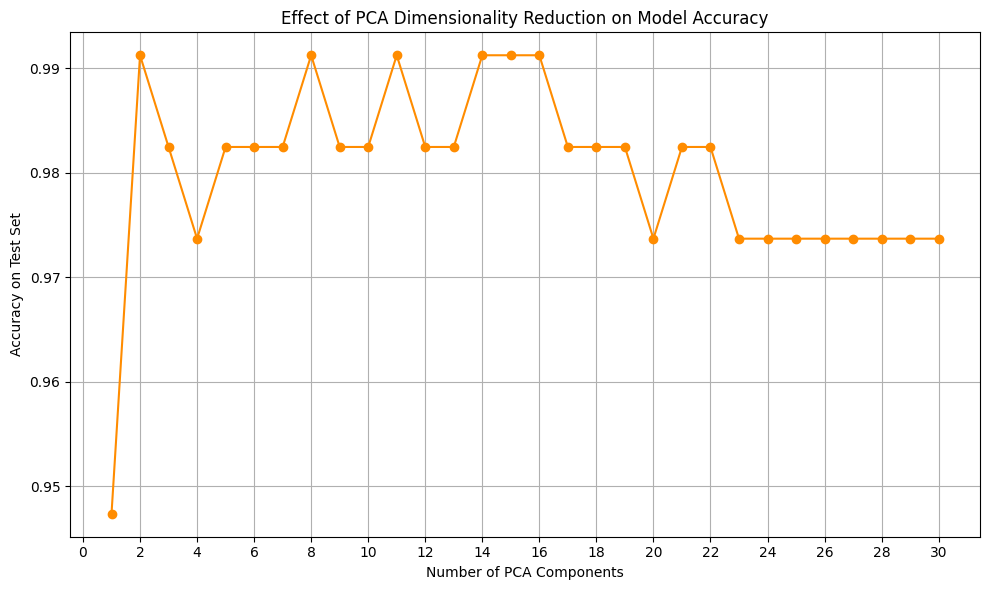

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,31), b, marker='o', linestyle='-', color='darkorange')
plt.title('Effect of PCA Dimensionality Reduction on Model Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy on Test Set')
plt.grid(True)
plt.xticks(range(0, 31, 2))
plt.tight_layout()
plt.show()